[**Demo %s**](#demo-linear-converge)

In [2]:
λ = 10
exact = x -> sinh(λ * x) / sinh(λ) - 1;

The following functions define the ODE.

In [3]:
p = x -> 0
q = x -> -λ^2
r = x -> λ^2;

We compare the computed solution to the exact one for increasing $n$.

In [4]:
n = 5 * [round(Int, 10^d) for d in 0:0.25:3]
err = zeros(length(n))
for (k, n) in enumerate(n)
    x, u = FNC.bvplin(p, q, r, [0, 1], -1, 0, n)
    err[k] = norm(exact.(x) - u, Inf)
end
data = (n = n[1:4:end], err = err[1:4:end])
@pt :header = ["n", "inf-norm error"] data

n,inf-norm error
5,0.0362375
50,0.000610896
500,6.1311e-6
5000,6.13171e-8


Each factor of 10 in $n$ reduces error by a factor of 100, which is indicative of second-order convergence.

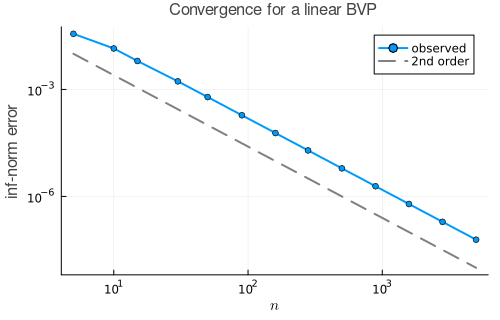

In [5]:
plot(n, err, m = :o,
    label = "observed",
    xaxis = (:log10, L"n"),
    yaxis = (:log10, "inf-norm error"),
    title = "Convergence for a linear BVP")
plot!(n, 0.25 * n .^ (-2), l = (:dash, :gray), label = "2nd order")